In [1]:
import pickle
import numpy as np
import os 
from matplotlib import pyplot as plt

In [2]:
def grab_results(filenames, dirpath, grab_task_name_func):
    total_results = {}
    for file in filenames:
        with open(os.path.join(dirpath, file), 'rb') as handle:
            results = pickle.load(handle)
            curr_results = {}
            curr_results['avg_score'] = results['avg_score']
            curr_results['std'] = results['std']
            task_key = grab_task_name_func(file)
            total_results[task_key] = curr_results 
    return total_results

In [3]:
def print_results(results_dict):
    for key, item in results_dict.items():
        score = item['avg_score']
        std = item['std']
        print(key + ': ', score, '+-', std)

In [4]:
ECFP_DIR = 'molecule-metalearning/results/ecfp_single_task_on_test_tasks'
ecfp_files = os.listdir(ECFP_DIR)
ecfp_results = grab_results(ecfp_files, ECFP_DIR, lambda x: x.split('.')[0])
print_results(ecfp_results)

CHEMBL1614170:  0.36369536955859516 +- 0.10232695661545338
CHEMBL1614359:  0.7284686691138161 +- 0.14707062544002014
CHEMBL1738019:  0.7307041793526586 +- 0.15293545569326816
CHEMBL1614202:  0.8966542532646775 +- 0.08589578380995921
CHEMBL1738021:  0.8988714198167245 +- 0.07856698455841168
CHEMBL1738131:  0.4759104935057459 +- 0.08529208964225012
CHEMBL1738202:  0.953152311668795 +- 0.08619726704220326
CHEMBL1794355:  0.9351236173505946 +- 0.06776127168601769
CHEMBL1794358:  0.26376745395127743 +- 0.21768922169413094
CHEMBL1794567:  0.9203700227868902 +- 0.03649651436529933
CHEMBL1909085:  0.24718470800346423 +- 0.15529835703464592
CHEMBL1909092:  0.06556306262536912 +- 0.07264783799222518
CHEMBL1909192:  0.012623246712193458 +- 0.004205102857621431
CHEMBL1909209:  0.26369099274697116 +- 0.13602954149840196
CHEMBL1909211:  0.49739506961145963 +- 0.13410668936789952
CHEMBL1909212:  0.04923384726603261 +- 0.02123649431913341
CHEMBL1963705:  0.5619580226780914 +- 0.10904305643077525
CHEMB

In [5]:
pretraining_parent_dir = '/home/apappu/thesis/molecule-metalearning-finetuning/molecule-metalearning/results/finetuning'
pretraining_model = 0
pretraining_name = 'pretraining_' + str(pretraining_model)
pretraining_dir = os.path.join(pretraining_parent_dir, pretraining_name)
pretraining_files = os.listdir(pretraining_dir)

pretraining_results = grab_results(pretraining_files, pretraining_dir, lambda x: x.split('_')[2])
print_results(pretraining_results)

CHEMBL1614170:  0.35974203613917305 +- 0.11805268463184476
CHEMBL1614202:  0.9284940117960392 +- 0.08358607421529694
CHEMBL1614359:  0.6210176723888419 +- 0.11724516039540808
CHEMBL1738019:  0.681750340481958 +- 0.13558473331760595
CHEMBL1738021:  0.957688217866789 +- 0.033210692050440783
CHEMBL1738131:  0.4459406058715776 +- 0.12134588826971125
CHEMBL1738202:  0.9090570098399768 +- 0.049486806464255906
CHEMBL1794355:  0.9544690797066364 +- 0.026639687375578494
CHEMBL1794358:  0.4151286939754432 +- 0.33098770523078797
CHEMBL1794567:  0.9388938793225275 +- 0.051380710072880004
CHEMBL1909085:  0.40819835582109326 +- 0.17566868027241728
CHEMBL1909092:  0.08442652440302816 +- 0.09928778290265038
CHEMBL1909192:  0.2799182299182299 +- 0.3698185511917481
CHEMBL1909209:  0.15454775050007008 +- 0.08796528857036841
CHEMBL1909211:  0.7802464966642633 +- 0.072398478737738
CHEMBL1909212:  0.15027228863760134 +- 0.15517476078722195
CHEMBL1963705:  0.7747012470673935 +- 0.044948538508653296
CHEMBL196

In [6]:
num_more = 0
num_total = 0
all_keys = zip(ecfp_results.keys(), pretraining_results.keys())
for ecfp_task, pretraining_task in all_keys:
    if ecfp_results[ecfp_task]['avg_score'] > pretraining_results[pretraining_task]['avg_score']:
        num_more += 1
    num_total += 1
print('ECFP is better on {} out of {} tasks which is {} percent'.format(num_more, num_total, float(num_more)/num_total * 100))

ECFP is better on 13 out of 26 tasks which is 50.0 percent


In [7]:
META_DIR= '/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/results/metatesting/'
MAML_DIR = META_DIR + 'maml/'
FO_MAML_DIR = META_DIR + 'fo_maml/'
ANIL_DIR = META_DIR + 'anil/'

maml_files = os.listdir(MAML_DIR)
fo_maml_files = os.listdir(FO_MAML_DIR)
anil_files = os.listdir(ANIL_DIR)

maml_results = grab_results(maml_files, MAML_DIR, lambda x: x.split('.')[0].split('_')[1])
fo_maml_results = grab_results(fo_maml_files, FO_MAML_DIR, lambda x: x.split('.')[0].split('_')[2])
anil_results = grab_results(anil_files, ANIL_DIR, lambda x: x.split('.')[0].split('_')[1])

In [8]:
# maml results
print_results(maml_results)

CHEMBL1614170:  0.45635523543558454 +- 0.08755572394312157
CHEMBL1614202:  0.9000342564288868 +- 0.07622669166068405
CHEMBL1614359:  0.7020903950125197 +- 0.1667662969597373
CHEMBL1738019:  0.7906520227024907 +- 0.08782627196899283
CHEMBL1738021:  0.9733303046714635 +- 0.02530837461816793
CHEMBL1738131:  0.5564985044170703 +- 0.14563079659605763
CHEMBL1738202:  0.9968092621664049 +- 0.006381475667189917
CHEMBL1794355:  0.9323467694843994 +- 0.02858139510065343
CHEMBL1794358:  0.5772605263888158 +- 0.29530037464965475
CHEMBL1794567:  0.9228736246941667 +- 0.06666125460108722
CHEMBL1909085:  0.8111319113892643 +- 0.1689480700450716
CHEMBL1909092:  0.5795634920634921 +- 0.36583686079666855
CHEMBL1909192:  0.23130842762636966 +- 0.3851036647534533
CHEMBL1909209:  0.5267653755261561 +- 0.1919321218361657
CHEMBL1909211:  0.8024170078321733 +- 0.10768185579388141
CHEMBL1909212:  0.18526167494820744 +- 0.12056980846039822
CHEMBL1963705:  0.8072101887102792 +- 0.07519973775964303
CHEMBL1963741:

In [11]:
# fo - maml results
print_results(fo_maml_results)

CHEMBL1614170:  0.3945515599773547 +- 0.15523648386040748
CHEMBL1614202:  0.8735412807559854 +- 0.11490281880369321
CHEMBL1614359:  0.6810082684244101 +- 0.16832139758183923
CHEMBL1738019:  0.9033358540226857 +- 0.12708278777841572
CHEMBL1738021:  0.8876068482337212 +- 0.08803928446609628
CHEMBL1738131:  0.6311790570892086 +- 0.08690154142155482
CHEMBL1738202:  0.9911472532351651 +- 0.013199095445733203
CHEMBL1794355:  0.8947583089211031 +- 0.04487608352354149
CHEMBL1794358:  0.5172778136260772 +- 0.32145614059032135
CHEMBL1794567:  0.9231393681504383 +- 0.06829004909846824
CHEMBL1909085:  0.6679344842702687 +- 0.2667921920736457
CHEMBL1909092:  0.7970833333333334 +- 0.2839686504606529
CHEMBL1909192:  0.04460645291527645 +- 0.01865718667377603
CHEMBL1909209:  0.5439473702173714 +- 0.2761232152383027
CHEMBL1909211:  0.7711535971647746 +- 0.13312406635745483
CHEMBL1909212:  0.07775076325370642 +- 0.03446460395752721
CHEMBL1963705:  0.7654247995727462 +- 0.07841072315648538
CHEMBL1963741:

In [12]:
# anil results
print_results(anil_results)

CHEMBL1614170:  0.3099749770248205 +- 0.09348363545107835
CHEMBL1614202:  0.9565626448419271 +- 0.04730107581005502
CHEMBL1614359:  0.6278253857460223 +- 0.1846943873037055
CHEMBL1738019:  0.7925599509577618 +- 0.1580074679862055
CHEMBL1738021:  0.8847123432400654 +- 0.11812112178036539
CHEMBL1738131:  0.44378827002721993 +- 0.17075159103307425
CHEMBL1738202:  0.9420105642221026 +- 0.03245593928724176
CHEMBL1794355:  0.9316551626147058 +- 0.03505431925898716
CHEMBL1794358:  0.33702376146600216 +- 0.33602302541463513
CHEMBL1794567:  0.9241508164860015 +- 0.07753778933328866
CHEMBL1909085:  0.2538294475032411 +- 0.11814232857110694
CHEMBL1909092:  0.059057818459595776 +- 0.07697400540510169
CHEMBL1909192:  0.025682572562808564 +- 0.036862325375635135
CHEMBL1909209:  0.27477359466293433 +- 0.16410096872248994
CHEMBL1909211:  0.4228911421830083 +- 0.13370624420848842
CHEMBL1909212:  0.050474137860645016 +- 0.017330009561001405
CHEMBL1963705:  0.8620683098562554 +- 0.04606624100792209
CHEMB

In [13]:
# score model 
def score_model_relative_to_others(first, *args):
#     import pdb; pdb.set_trace()
    other_results = args
    num_more = [0] * len(args)
    num_total = 0
    for task in first.keys():
        for i, other_result in enumerate(other_results):
            if first[task]['avg_score'] > other_result[task]['avg_score']:
                num_more[i] += 1
        num_total += 1
    # print results
    for i, num in enumerate(num_more):
        print("First is better than other model {} on {} out of {} which is {} percent".format(i, num, num_total, float(num)/num_total * 100))

In [14]:
# ecfp vs pretraining
score_model_relative_to_others(ecfp_results, pretraining_results)

First is better than other model 0 on 13 out of 26 which is 50.0 percent


In [15]:
# maml vs ecfp and pretraining
score_model_relative_to_others(maml_results, ecfp_results, pretraining_results)

First is better than other model 0 on 19 out of 26 which is 73.07692307692307 percent
First is better than other model 1 on 20 out of 26 which is 76.92307692307693 percent


In [16]:
# fo maml vs ecfp and pretraining
score_model_relative_to_others(fo_maml_results, ecfp_results, pretraining_results)

First is better than other model 0 on 20 out of 26 which is 76.92307692307693 percent
First is better than other model 1 on 18 out of 26 which is 69.23076923076923 percent


In [17]:
# anil vs ecfp and pretraining
score_model_relative_to_others(anil_results, ecfp_results, pretraining_results)

First is better than other model 0 on 12 out of 26 which is 46.15384615384615 percent
First is better than other model 1 on 12 out of 26 which is 46.15384615384615 percent


In [18]:
# maml vs fo maml
score_model_relative_to_others(maml_results, fo_maml_results)

First is better than other model 0 on 12 out of 26 which is 46.15384615384615 percent


In [19]:
# maml vs anil
score_model_relative_to_others(maml_results, anil_results)

#fomaml vs anil
score_model_relative_to_others(fo_maml_results, anil_results)

First is better than other model 0 on 19 out of 26 which is 73.07692307692307 percent
First is better than other model 0 on 19 out of 26 which is 73.07692307692307 percent


## Initial commentary
#### We see that maml and fo maml cleanly outperform the ECFP and pretraining baseline. We see that ECFP only outperforms pretraining on 50% of tasks, meaning that which baseline outperforms the other is very task dependent (need to print the number of datapoints per task for this to make sense too, as that might be a good pointer for when ECFP baselines are still relevant).

#### However, this is not true for ANIL, where ANIL scores better than ECFP and pretraining baselines on fewer than half the tasks.

#### We also see that maml and fo maml clearly outperform anil, scoring better than ANIL on 75% of tasks. This merits investigation into task similarity on the tasks that are outperformed on vs the tasks that are under performed on.

#### In terms of average lowest rank: MAML and FO-MAML have the lowest average rank, followed by Pretraining, ECFP baseline, and ANIL (see google spreadsheet, https://docs.google.com/spreadsheets/d/1I2IQChFmeMbxtJal742hFH4ewivgwvFm2zLINVZsMPM/edit#gid=0)

#### In terms of out of distribution vs in distribution, meta learning methods win on *all* out of distribution tasks. There are 6 out of dist total, FO-MAML wins on 4, MAML wins on 1, ANIL wins on 1. 

#### Average Rank for out of distribution is: 
* FOMAML: 1.666666667 
* MAML: 2.666666667 
* ECFP: 3.166666667  
* ANIL: 3.5 
* Pretraining: 4.
Pretraining seems to exhibit negative transfer relative to ECFP baseline as it ranks lower on 'out of dist' tasks. 

#### Average Rank on in distribution is: 
* MAML: 2.2 
* FOMAML: 2.5
* Pretraining: 3.25 
* ANIL: 3.5
* ECFP: 3.55	

Interestingly, pretraining shows postivie transfer on in distribution tasks (outperforms ECFP baseline). MAML wins on in distribution tasks, with lower average rank than FO MAML. 

#### Overall, these results are good! They:
* confirm findings in the GSK paper that MAML and FO MAML do outperform pretraining baselines and ANIL. 
* let us say that MAML and FO MAML *also* outperform ECFP baselines, which was a primary research question of interest
* let us say that pretraining baselines struggle to consistently outperform ecfp baselines, so compared to no meta learning and just multitask learning on low data tasks, ecfp baselines are a strong baseline that should still be considered, but on a task dependent basis.
* let us make the above conclusions with regards to scaffold splits, which the GSK paper was not able to say

#### This leaves many possible questions to investigate:
* On the 'ecfp baselines should still be considered relative to pretraining baselines' point, it would be great to dissect these results by num data points too -- see what the correlation is between # datapoints and the difference(pretraining score - ecfp score).
* What is differrent between the tasks that MAML outperforms ANIL on and the tasks that ANIL remains competitive? If we run task similarity experiments (CKA and CCA) on each task, I wonder if the similarity graphs will look substantially different between the task set MAML outperforms, and task set that ANIL outperforms. 
    * This also leads to questions of how to measure task similarity. I haven't seen a lot on this. Kyle told me one thing they like to do is plot the average morgan fingerprint for each task as a t-SNE, and use clusters to identify similar tasks. After letting this mull a bit, I think this is only half the story -- a task isn't solely defined by its input data distribution (which is what the t-SNE gives a sense of), but also the label distribution. For example, take one task, and make a new task by taking every datapoint and flipping its label. In t-sne embedding space, the new task is identical to the old one, but this seems clearly misleading. 
    * An idea I had recently -- what if you measured task similarity by the euclidean distance of optimized model parameters for each task? I.e., take one architecture, train it to convergence on a task, and view those optimized parameters as a task embedding. My underlying idea here is that similar tasks should have similar loss landscapes, so a set of parameters optimized for one task will perform well on another task if their loss landscapes are similar (this intuition is also inline with positive transfer on similar tasks). A first pass would be to take the optimized model parameters on each task (vanilla chemprop, no pretraining), and then run k-means clustering to see if we could recover the *original* task distribution -- i.e. we know K = 5 for (B, F, A, T, U) tasks, I wonder if running k-means on the optimized embeddings would recover the correct groupings.
* We could also dissect why FO MAML outperforms MAML on 14/26 tasks. It's *almost* a toss up, but not quite. This question could go either way in terms of being intersting -- is maybe not as interesting because it could just be a result on this specific task sample (the GSK paper has MAML outperform FOMAML on majority of tasks). This question is maybe interesting in the sense that FOMAML is much faster to train than MAML, so understanding in what circumstances FOMAML does better could be an interesting research avenue. I'm less inclined towards this direction than the ANIL direction since ANIL directly investigates task similarity which I think is more interesting.

In [20]:
# Let's investigate correlation of datapoints and pretraining - ecfp baseline points (we expect to see positive correlation)
from scipy.stats import pearsonr, linregress

In [21]:
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/meta_test_task_stats.pickle', 'rb') as handle:
    test_task_stats = pickle.load(handle)

In [35]:
def calculate_correlation_diff_datapoints(results1, results2, test_task_stats, plot_percent = True, name1 = None, name2 = None):
    """
    Calculates correlation coeff of num datapoints vs (results1score - results2score) across tasks
    """
    tasks = list(test_task_stats.keys())
    num_datapoints = []
    results1_minus_results2_difference = []
    for task in tasks:
        num_datapoints.append(test_task_stats[task]['total_datapoints'])
        first_score = results1[task]['avg_score']
        second_score = results2[task]['avg_score']
        if plot_percent:
            difference = (first_score - second_score) * 100
        else:
            difference = first_score - second_score
        results1_minus_results2_difference.append(difference)
    num_datapoints = np.array(num_datapoints)
    results1_minus_results2_difference = np.array(results1_minus_results2_difference)
    
    # sort them 
    indices = np.argsort(num_datapoints)
    num_datapoints = num_datapoints[indices]
    results1_minus_results2_difference = results1_minus_results2_difference[indices]
    
    # plot and calculate
    plt.scatter(num_datapoints, results1_minus_results2_difference)
    if name1 and name2:
        plt.title('{} vs {}'.format(name1, name2))
    plt.xlabel('Number of datapoints')
    plt.ylabel('Difference in average score over five folds (%)')
    corr, p_value = pearsonr(num_datapoints, results1_minus_results2_difference)
    print('Correlation is: {} and accompanying R^2 is {}'.format(corr, corr**2))
    print('P value for this correlation fit is: {}'.format(p_value))

### The below positive correlation and scatter plot suggest that for lower than 400 ish datapoints, ECFP are stronger baselines than pretraining baselines, but after 400ish datapoints, pretraining architectures outperform ecfp baselines

### To ask Brooks:
how do we interpret what a 'reasonable' R value is for making conclusions? the correlation certainly != 0
when to prefer R**2 over correlation?

Correlation is: 0.5383852018366724 and accompanying R^2 is 0.28985862555671443
P value for this correlation fit is: 0.00454903093834115


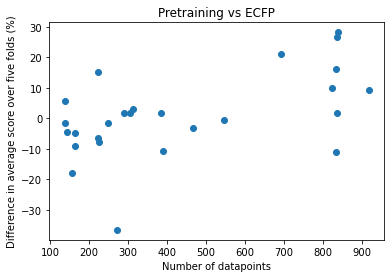

In [36]:
# Pretraining vs ECFP
calculate_correlation_diff_datapoints(pretraining_results, ecfp_results, test_task_stats, name1='Pretraining', name2='ECFP')

# Look at significance of linear regression coefficienct 
# data uncertainty -- we shouldn't necessarily expect all of variation to be explained by the number of datapoints in the task
# look at p-value on coefficient 

Correlation is: 0.6924477147131434 and accompanying R^2 is 0.4794838376114548
P value for this correlation fit is: 8.861060920277935e-05


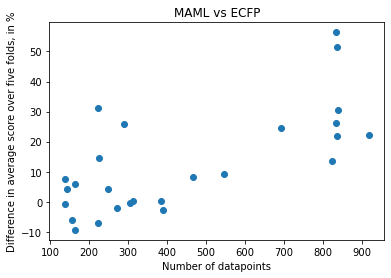

In [24]:
# Let's run the same on MAML vs ECFP
calculate_correlation_diff_datapoints(maml_results, ecfp_results, test_task_stats, name1='MAML', name2='ECFP')

Correlation is: 0.3001950081250282 and accompanying R^2 is 0.09011704290318574
P value for this correlation fit is: 0.13621570100431954


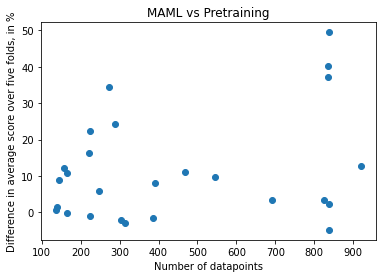

In [25]:
# MAML vs Pretraining
calculate_correlation_diff_datapoints(maml_results, pretraining_results, test_task_stats, name1='MAML', name2='Pretraining')

# Look at out of distribution vs in distribution for test tasks that are worse 
# 

Correlation is: 0.4423043664186346 and accompanying R^2 is 0.19563315255298977
P value for this correlation fit is: 0.023664237408026447


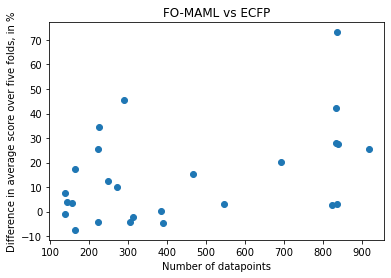

In [26]:
# FO MAML vs ECFP
calculate_correlation_diff_datapoints(fo_maml_results, ecfp_results, test_task_stats, name1='FO-MAML', name2='ECFP')

Correlation is: 0.046995828589698 and accompanying R^2 is 0.002208607904832276
P value for this correlation fit is: 0.8196673160367781


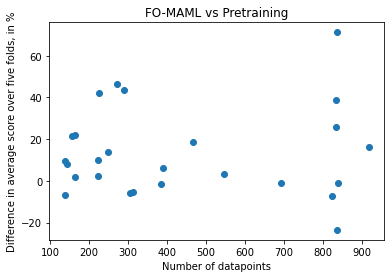

In [27]:
# FO MAML vs Pretraining
calculate_correlation_diff_datapoints(fo_maml_results, pretraining_results, test_task_stats, name1='FO-MAML', name2='Pretraining')

Correlation is: 0.1319858973227349 and accompanying R^2 is 0.017420277092087523
P value for this correlation fit is: 0.5204050745861233


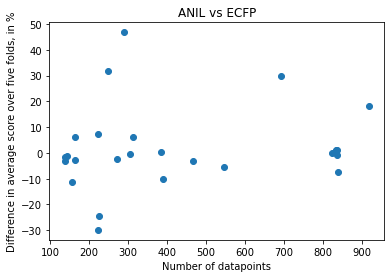

In [28]:
# ANIL vs ECFP
calculate_correlation_diff_datapoints(anil_results, ecfp_results, test_task_stats, name1='ANIL', name2='ECFP')

### The next graph suggests that as datasize increases, pretraining outperforms ANIL! However, MAML outperforms Pretraining *more* as datasize increases within our range. This is peculiar and I'm not sure how to interpret this..

### Answer is I think don't worry about it as the fits aren't significant by p value

Correlation is: -0.29839562811154097 and accompanying R^2 is 0.08903995087608106
P value for this correlation fit is: 0.1386949444367001


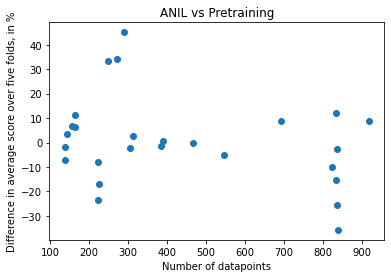

In [29]:
# ANIL vs Pretraining
calculate_correlation_diff_datapoints(anil_results, pretraining_results, test_task_stats, name1='ANIL', name2='Pretraining')

Correlation is: 0.33370445787283914 and accompanying R^2 is 0.11135866520420548
P value for this correlation fit is: 0.09570753331260101


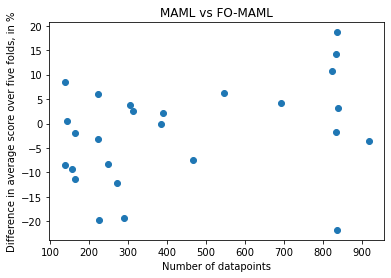

In [30]:
# MAML vs FOMAML
calculate_correlation_diff_datapoints(maml_results, fo_maml_results, test_task_stats, name1='MAML', name2='FO-MAML')

Correlation is: 0.49166827839787886 and accompanying R^2 is 0.24173769598273412
P value for this correlation fit is: 0.010740754614415614


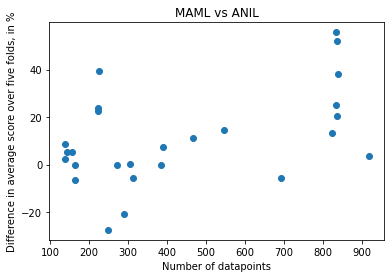

In [31]:
# MAML vs ANIL
calculate_correlation_diff_datapoints(maml_results, anil_results, test_task_stats, name1='MAML', name2='ANIL')

In [32]:
# plot pretraining performance vs number of datapoints to examine intuition of efficacy of finetuning being very dependent on num datapoints

### Takeaways from correlations

#### All models (meta learning and pretraining) outperform ECFP as datasize increases. This is what we expect. ECFP is competitive/outperforms pretraining baseline for lower data tasks (approx < 400 datapoints from eye balling), which means ECFP baselines are very relevant for extremely low data tasks if not using meta learning. With MAML, MAML is still competitive with ECFP at the lowest data tasks. 

#### Now let's get to MAML vs FOMAML vs ANIL. For some reason, FOMAML slightly outperforms MAML in the raw comparison (num tasks outperformed), by outperforming MAML on 14/26 test tasks. MAML and FOMAML's performance improves with larger data tasks compared to pretraining, but ANIL's performance gets *worse* with increased performance compared to pretraining baseline.

#### As expected, MAML and FO-MAML both outperform ANIL on the majority of test tasks (73%). It will be interesting to see *why* there are tasks that MAML and FO MAML outperform ANIL on and vice versa!



In [178]:
for task in test_task_stats.keys():
    print('Task: {} Datapoints {}'.format(task, test_task_stats[task]['total_datapoints']))

Task: CHEMBL1614170 Datapoints 546
Task: CHEMBL1614202 Datapoints 314
Task: CHEMBL1614359 Datapoints 390
Task: CHEMBL1738019 Datapoints 165
Task: CHEMBL1738021 Datapoints 138
Task: CHEMBL1738131 Datapoints 468
Task: CHEMBL1738202 Datapoints 144
Task: CHEMBL1794355 Datapoints 304
Task: CHEMBL1794358 Datapoints 222
Task: CHEMBL1794567 Datapoints 385
Task: CHEMBL1909085 Datapoints 835
Task: CHEMBL1909092 Datapoints 838
Task: CHEMBL1909192 Datapoints 838
Task: CHEMBL1909209 Datapoints 835
Task: CHEMBL1909211 Datapoints 839
Task: CHEMBL1909212 Datapoints 824
Task: CHEMBL1963705 Datapoints 692
Task: CHEMBL1963741 Datapoints 919
Task: CHEMBL1963934 Datapoints 165
Task: CHEMBL2028077 Datapoints 289
Task: CHEMBL2095143 Datapoints 273
Task: CHEMBL2098499 Datapoints 137
Task: CHEMBL2114797 Datapoints 224
Task: CHEMBL3215116 Datapoints 248
Task: CHEMBL3215176 Datapoints 157
Task: CHEMBL918058 Datapoints 225


In [179]:
with open('/home/apappu/thesis/molecule-metalearning/filtered_chembl/chembl_assay_name_to_type.pickle', 'rb') as handle:
    assay_name_to_type = pickle.load(handle)

In [181]:
in_dist_total = 0
out_dist_total = 0
maml_win_in_dist = 0
maml_win_out_dist = 0

for task in test_task_stats.keys():
    assay_type = assay_name_to_type[task]
    other_scores = [result[task]['avg_score'] for result in [ecfp_results, pretraining_results, fo_maml_results, anil_results]]
    if assay_type in ['B', 'F']:
        # in distribution
        in_dist_total += 1 
        if all(maml_results[task]['avg_score'] > score for score in other_scores):
            maml_win_in_dist += 1
    else:
        # out dist
        out_dist_total += 1
        if all(maml_results[task]['avg_score'] > score for score in other_scores):
                    maml_win_out_dist += 1
    print("Task: {} Assay type: {}".format(task, assay_name_to_type[task]))
    

Task: CHEMBL1614170 Assay type: F
Task: CHEMBL1614202 Assay type: F
Task: CHEMBL1614359 Assay type: B
Task: CHEMBL1738019 Assay type: U
Task: CHEMBL1738021 Assay type: U
Task: CHEMBL1738131 Assay type: F
Task: CHEMBL1738202 Assay type: F
Task: CHEMBL1794355 Assay type: F
Task: CHEMBL1794358 Assay type: B
Task: CHEMBL1794567 Assay type: F
Task: CHEMBL1909085 Assay type: B
Task: CHEMBL1909092 Assay type: B
Task: CHEMBL1909192 Assay type: B
Task: CHEMBL1909209 Assay type: B
Task: CHEMBL1909211 Assay type: B
Task: CHEMBL1909212 Assay type: B
Task: CHEMBL1963705 Assay type: F
Task: CHEMBL1963741 Assay type: F
Task: CHEMBL1963934 Assay type: F
Task: CHEMBL2028077 Assay type: T
Task: CHEMBL2095143 Assay type: T
Task: CHEMBL2098499 Assay type: A
Task: CHEMBL2114797 Assay type: F
Task: CHEMBL3215116 Assay type: B
Task: CHEMBL3215176 Assay type: B
Task: CHEMBL918058 Assay type: A


In [183]:
print(maml_win_in_dist, in_dist_total)

6 20


In [184]:
print(maml_win_out_dist, out_dist_total)

1 6


#### WILCOXON Results

In [25]:
from scipy.stats import wilcoxon

In [28]:
# all tasks

In [33]:
tasks = ecfp_results.keys()
ecfp_all_vector = np.array([ecfp_results[task]['avg_score'] for task in tasks])
pretraining_all_vector = np.array([pretraining_results[task]['avg_score'] for task in tasks])
maml_all_vector = np.array([maml_results[task]['avg_score'] for task in tasks])
fomaml_all_vector = np.array([fo_maml_results[task]['avg_score'] for task in tasks])
anil_all_vector = np.array([anil_results[task]['avg_score'] for task in tasks])

all_vectors = {'ecfp': ecfp_all_vector, 'pretraining': pretraining_all_vector, 'maml': maml_all_vector, 'fomaml': fomaml_all_vector, 'anil': anil_all_vector}

In [43]:
methods = list(vectors.keys())
for i in range(len(methods)):
    for j in range(i + 1, len(methods)):
        vec1 = all_vectors[methods[i]]
        vec2 = all_vectors[methods[j]]
        statistic, p_value = wilcoxon(vec1, vec2)
        print('For {} and {}, stat is {} p_value is {}'.format(methods[i], methods[j], statistic, p_value))

For ecfp and pretraining, stat is 162.0 p_value is 0.7316942357149899
For ecfp and maml, stat is 52.0 p_value is 0.001708898843971795
For ecfp and fomaml, stat is 47.0 p_value is 0.0010999079687827968
For ecfp and anil, stat is 167.0 p_value is 0.8290790993681643
For pretraining and maml, stat is 34.0 p_value is 0.0003258727792625274
For pretraining and fomaml, stat is 62.0 p_value is 0.0039431977414849115
For pretraining and anil, stat is 175.0 p_value is 0.98986794535872
For maml and fomaml, stat is 147.0 p_value is 0.4691625250282967
For maml and anil, stat is 77.0 p_value is 0.01235983439208636
For fomaml and anil, stat is 61.0 p_value is 0.0036366878938305404


In [31]:
out_of_dist_tasks = ['CHEMBL2098499', 'CHEMBL1738021', 'CHEMBL1738019', 'CHEMBL918058', 'CHEMBL2095143', 'CHEMBL2028077']
in_dist_tasks = [task for task in tasks if task not in out_of_dist_tasks]

In [35]:
# out of dist

In [36]:
ecfp_out_vector = np.array([ecfp_results[task]['avg_score'] for task in out_of_dist_tasks])
pretraining_out_vector = np.array([pretraining_results[task]['avg_score'] for task in out_of_dist_tasks])
maml_out_vector = np.array([maml_results[task]['avg_score'] for task in out_of_dist_tasks])
fomaml_out_vector = np.array([fo_maml_results[task]['avg_score'] for task in out_of_dist_tasks])
anil_out_vector = np.array([anil_results[task]['avg_score'] for task in out_of_dist_tasks])

out_vectors = {'ecfp': ecfp_out_vector, 'pretraining': pretraining_out_vector, 'maml': maml_out_vector, 'fomaml': fomaml_out_vector, 'anil': anil_out_vector}

In [37]:
for i in range(len(methods)):
    for j in range(i + 1, len(methods)):
        vec1 = out_vectors[methods[i]]
        vec2 = out_vectors[methods[j]]
        statistic, p_value = wilcoxon(vec1, vec2)
        print('For {} vs {}, stat is {} p_value is {}'.format(methods[i], methods[j], statistic, p_value))

For ecfp vs pretraining, stat is 6.0 p_value is 0.3454475304692257
For ecfp vs maml, stat is 3.0 p_value is 0.11585149752593009
For ecfp vs fomaml, stat is 1.0 p_value is 0.046399461870904594
For ecfp vs anil, stat is 10.0 p_value is 0.916511907863894
For pretraining vs maml, stat is 0.0 p_value is 0.027707849358079864
For pretraining vs fomaml, stat is 1.0 p_value is 0.046399461870904594
For pretraining vs anil, stat is 7.0 p_value is 0.463071015014588
For maml vs fomaml, stat is 2.0 p_value is 0.07473549830588248
For maml vs anil, stat is 7.0 p_value is 0.463071015014588
For fomaml vs anil, stat is 2.0 p_value is 0.07473549830588248


/home/apappu/miniconda3/envs/chemprop/lib/python3.6/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [38]:
# in dist

In [39]:
ecfp_in_vector = np.array([ecfp_results[task]['avg_score'] for task in in_dist_tasks])
pretraining_in_vector = np.array([pretraining_results[task]['avg_score'] for task in in_dist_tasks])
maml_in_vector = np.array([maml_results[task]['avg_score'] for task in in_dist_tasks])
fomaml_in_vector = np.array([fo_maml_results[task]['avg_score'] for task in in_dist_tasks])
anil_in_vector = np.array([anil_results[task]['avg_score'] for task in in_dist_tasks])

in_vectors = {'ecfp': ecfp_in_vector, 'pretraining': pretraining_in_vector, 'maml': maml_in_vector, 'fomaml': fomaml_in_vector, 'anil': anil_in_vector}

In [42]:
for i in range(len(methods)):
    for j in range(i + 1, len(methods)):
        vec1 = in_vectors[methods[i]]
        vec2 = in_vectors[methods[j]]
        statistic, p_value = wilcoxon(vec1, vec2)
        print('For {} vs {}, stat is {} p_value is {}'.format(methods[i], methods[j], statistic, p_value))

For ecfp vs pretraining, stat is 80.0 p_value is 0.3506564539028397
For ecfp vs maml, stat is 32.0 p_value is 0.0064246026289671515
For ecfp vs fomaml, stat is 40.0 p_value is 0.015240061183200121
For ecfp vs anil, stat is 104.0 p_value is 0.970219757029658
For pretraining vs maml, stat is 25.0 p_value is 0.0028208603832232753
For pretraining vs fomaml, stat is 48.0 p_value is 0.03334022025101753
For pretraining vs anil, stat is 93.0 p_value is 0.654158944417145
For maml vs fomaml, stat is 90.0 p_value is 0.5754862281364963
For maml vs anil, stat is 40.0 p_value is 0.015240061183200121
For fomaml vs anil, stat is 45.0 p_value is 0.02509350819808047
